In [360]:
# QUESTION 1 - Use yfinance to extract stock data (TSLA)

!pip install yfinance
!pip install numpy
!pip install pandas

import yfinance as yf
import pandas as pd
import json

tesla=yf.Ticker('TSLA')

tesla_data=tesla.history(period='5d')
tesla_data.reset_index(inplace=True)
tesla_data.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-05-07 00:00:00-04:00,182.399994,183.259995,177.399994,177.809998,75045900,0.0,0.0
1,2024-05-08 00:00:00-04:00,171.589996,176.059998,170.149994,174.720001,79969500,0.0,0.0
2,2024-05-09 00:00:00-04:00,175.009995,175.619995,171.369995,171.970001,65950300,0.0,0.0
3,2024-05-10 00:00:00-04:00,173.050003,173.059998,167.750000,168.470001,72350200,0.0,0.0
4,2024-05-13 00:00:00-04:00,170.009995,175.399994,169.029999,171.732498,46489219,0.0,0.0


In [362]:
# QUESTION 2 - Use Webscraping to extract tesla revenue data

#Already Installed so won't run the install again
#!pip install requests
#!pip install bs4
#!pip install html5lib
#!pip install lxml

import requests
from bs4 import BeautifulSoup

# Yahoo finance is whack so I found another source
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
data=requests.get(url, headers=headers).text

soup=BeautifulSoup(data, 'html5lib')

tesladata=pd.DataFrame()

tbods=soup.find_all('tbody')[1]
tbodstext=tbods.text
tbodstextclean = tbodstext.replace('\t', ' ')
llist=tbodstextclean.splitlines()

filtered_lines = list(filter(lambda x: x.strip(), llist))
filtered_lines
dates=filtered_lines[0:109:2]
revs=filtered_lines[1:110:2]

tesladata.insert(0, 'Quarter Ending:', dates)
tesladata.insert(1,'Revenue ($M)',revs)

tesladata.tail(5)


,Quarter Ending:,Revenue ($M)
50,2011-06-30,$58
51,2011-03-31,$49
52,2010-12-31,$36
53,2010-09-30,$31
54,2010-06-30,$28


In [364]:
#QUESTION 3 - Use yfinance to extract stock data (GME)

gme=yf.Ticker('GME')

gme_data=gme.history(period='5d')
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-05-07 00:00:00-04:00,15.850000,17.290001,14.930000,16.309999,24308600,0.0,0.0
1,2024-05-08 00:00:00-04:00,16.049999,17.240000,15.330000,15.920000,24775100,0.0,0.0
2,2024-05-09 00:00:00-04:00,15.900000,18.510000,15.350000,18.010000,25759300,0.0,0.0
3,2024-05-10 00:00:00-04:00,17.930000,20.200001,16.879999,17.459999,36807500,0.0,0.0
4,2024-05-13 00:00:00-04:00,26.340000,38.154999,24.770000,29.889999,119024051,0.0,0.0


In [366]:
# QUESTION 4 - Use Webscraping to extract gamestop revenue data


url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
data=requests.get(url, headers=headers).text

soup=BeautifulSoup(data, 'html5lib')

gmedata=pd.DataFrame()

tbods=soup.find_all('tbody')[1]
tbodstext=tbods.text
tbodstextclean = tbodstext.replace('\t', ' ')
llist=tbodstextclean.splitlines()

filtered_lines = list(filter(lambda x: x.strip(), llist))
filtered_lines
dates=filtered_lines[0:109:2]
revs=filtered_lines[1:110:2]

gmedata.insert(0, 'Quarter Ending:', dates)
gmedata.insert(1,'Revenue ($M)',revs)

gmedata.tail(5)

,Quarter Ending:,Revenue ($M)
50,2011-07-31,"$1,744"
51,2011-04-30,"$2,281"
52,2011-01-31,"$3,693"
53,2010-10-31,"$1,899"
54,2010-07-31,"$1,799"


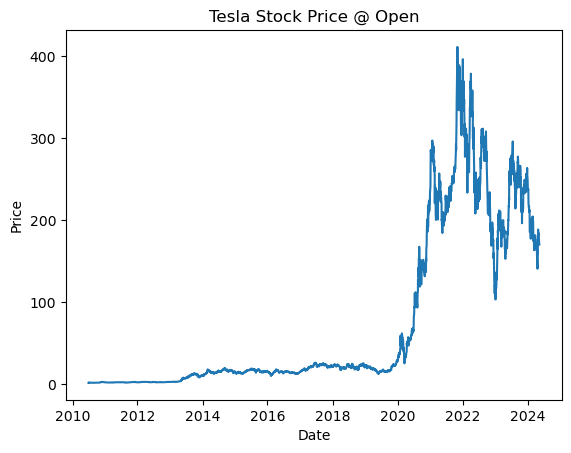

In [368]:
# QUESTION 5 - Plot Tesla Stock Graph


tesla=yf.Ticker('TSLA')

tesla_data=tesla.history(period='10000d')
tesla_data.reset_index(inplace=True)
tesla_data.head(5)


import matplotlib.pyplot as plt

def make_graph (x, y):
    plt.figure()
    plt.plot(x, y)
    plt.title('Tesla Stock Price @ Open')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
    
make_graph(tesla_data['Date'], tesla_data['Open'])
    


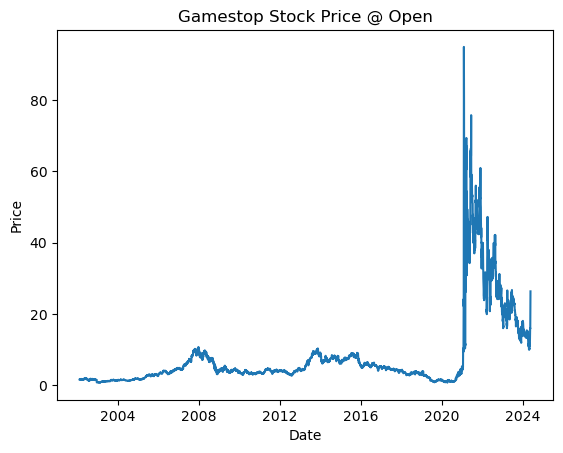

In [370]:
# QUESTION 6 - Plot Gamestop Stock Graph


gme=yf.Ticker('GME')

gme_data=gme.history(period='10000d')
gme_data.reset_index(inplace=True)
gme_data.head(5)


import matplotlib.pyplot as plt

def make_graph (x, y):
    plt.figure()
    plt.plot(x, y)
    plt.title('Gamestop Stock Price @ Open')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
    
make_graph(gme_data['Date'], gme_data['Open'])